In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [18]:
data= pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [20]:
description=data.describe()
description.to_csv("描述性统计信息.csv", index=True) 

In [21]:
data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

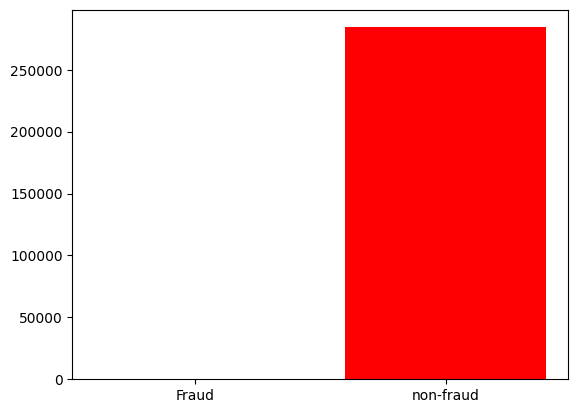

<Figure size 640x480 with 0 Axes>

In [23]:

num_nonfraud = np.sum(data['Class'] == 0)
num_fraud = np.sum(data['Class'] == 1)
plt.bar(['Fraud', 'non-fraud'], [num_fraud, num_nonfraud], color='red')
plt.show()
plt.savefig("fraud.eps", format='eps', dpi=1000) 

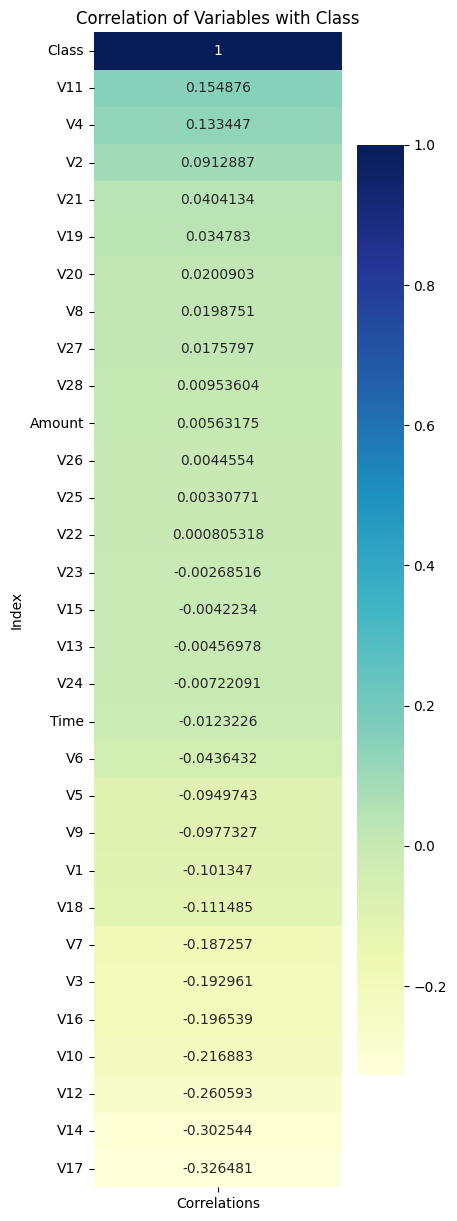

<Figure size 640x480 with 0 Axes>

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corrwith(data['Class']).reset_index()
corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False)
plt.figure(figsize=(4,15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='YlGnBu')
plt.title("Correlation of Variables with Class")
plt.show()
plt.savefig("Correlation.eps", format='eps', dpi=1000) 

In [25]:
X = data.drop(['Time','Class'],axis=1)
Y = data.Class

In [26]:
iforest = IsolationForest()
iforest.fit(X)
data['label'] = iforest.fit_predict(X) 
data['label'] = (data['label'] + 1) // 2
data['label'] = 1 - data['label']
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,1
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


In [27]:
from sklearn.metrics import accuracy_score, recall_score

predictions = data['label']
true_labels = data['Class']

accuracy = accuracy_score(true_labels, predictions)


recall = recall_score(true_labels, predictions)

print("准确率：", accuracy)
print("召回率：", recall)

准确率： 0.963399775988652
召回率： 0.8211382113821138


In [28]:
features =list(corr[corr['Correlations'] > 0].index)
features

['Class',
 'V11',
 'V4',
 'V2',
 'V21',
 'V19',
 'V20',
 'V8',
 'V27',
 'V28',
 'Amount',
 'V26',
 'V25',
 'V22']

In [29]:
data_features=data[features]
data_features

,Class,V11,V4,V2,V21,V19,V20,V8,V27,V28,Amount,V26,V25,V22
0,0,-0.551600,1.378155,-0.072781,-0.018307,0.403993,0.251412,0.098698,0.133558,-0.021053,149.62,-0.189115,0.128539,0.277838
1,0,1.612727,0.448154,0.266151,-0.225775,-0.145783,-0.069083,0.085102,-0.008983,0.014724,2.69,0.125895,0.167170,-0.638672
2,0,0.624501,0.379780,-1.340163,0.247998,-2.261857,0.524980,0.247676,-0.055353,-0.059752,378.66,-0.139097,-0.327642,0.771679
3,0,-0.226487,-0.863291,-0.185226,-0.108300,-1.232622,-0.208038,0.377436,0.062723,0.061458,123.50,-0.221929,0.647376,0.005274
4,0,-0.822843,0.403034,0.877737,-0.009431,0.803487,0.408542,-0.270533,0.219422,0.215153,69.99,0.502292,-0.206010,0.798278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,-1.593105,-2.066656,10.071785,0.213454,-0.682920,1.475829,7.305334,0.943651,0.823731,0.77,0.250034,1.436807,0.111864
284803,0,-0.150189,-0.738589,-0.055080,0.214205,-1.545556,0.059616,0.294869,0.068472,-0.053527,24.79,-0.395255,-0.606624,0.924384
284804,0,0.411614,-0.557828,-0.301254,0.232045,-0.577252,0.001396,0.708417,0.004455,-0.026561,67.88,-0.087371,0.265745,0.578229
284805,0,-1.933849,0.689799,0.530483,0.265245,2.897849,0.127434,0.679145,0.108821,0.104533,10.00,0.546668,-0.569159,0.800049


In [30]:
X_new = data_features.drop(['Class'],axis=1)
Y_new = data_features.Class
X_new

,V11,V4,V2,V21,V19,V20,V8,V27,V28,Amount,V26,V25,V22
0,-0.551600,1.378155,-0.072781,-0.018307,0.403993,0.251412,0.098698,0.133558,-0.021053,149.62,-0.189115,0.128539,0.277838
1,1.612727,0.448154,0.266151,-0.225775,-0.145783,-0.069083,0.085102,-0.008983,0.014724,2.69,0.125895,0.167170,-0.638672
2,0.624501,0.379780,-1.340163,0.247998,-2.261857,0.524980,0.247676,-0.055353,-0.059752,378.66,-0.139097,-0.327642,0.771679
3,-0.226487,-0.863291,-0.185226,-0.108300,-1.232622,-0.208038,0.377436,0.062723,0.061458,123.50,-0.221929,0.647376,0.005274
4,-0.822843,0.403034,0.877737,-0.009431,0.803487,0.408542,-0.270533,0.219422,0.215153,69.99,0.502292,-0.206010,0.798278
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-1.593105,-2.066656,10.071785,0.213454,-0.682920,1.475829,7.305334,0.943651,0.823731,0.77,0.250034,1.436807,0.111864
284803,-0.150189,-0.738589,-0.055080,0.214205,-1.545556,0.059616,0.294869,0.068472,-0.053527,24.79,-0.395255,-0.606624,0.924384
284804,0.411614,-0.557828,-0.301254,0.232045,-0.577252,0.001396,0.708417,0.004455,-0.026561,67.88,-0.087371,0.265745,0.578229
284805,-1.933849,0.689799,0.530483,0.265245,2.897849,0.127434,0.679145,0.108821,0.104533,10.00,0.546668,-0.569159,0.800049


In [31]:
iforest = IsolationForest()
iforest.fit(X_new)
data_features['label'] = iforest.fit_predict(X_new) 
data_features

C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2063856042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)


,Class,V11,V4,V2,V21,V19,V20,V8,V27,V28,Amount,V26,V25,V22,label
0,0,-0.551600,1.378155,-0.072781,-0.018307,0.403993,0.251412,0.098698,0.133558,-0.021053,149.62,-0.189115,0.128539,0.277838,1
1,0,1.612727,0.448154,0.266151,-0.225775,-0.145783,-0.069083,0.085102,-0.008983,0.014724,2.69,0.125895,0.167170,-0.638672,1
2,0,0.624501,0.379780,-1.340163,0.247998,-2.261857,0.524980,0.247676,-0.055353,-0.059752,378.66,-0.139097,-0.327642,0.771679,1
3,0,-0.226487,-0.863291,-0.185226,-0.108300,-1.232622,-0.208038,0.377436,0.062723,0.061458,123.50,-0.221929,0.647376,0.005274,1
4,0,-0.822843,0.403034,0.877737,-0.009431,0.803487,0.408542,-0.270533,0.219422,0.215153,69.99,0.502292,-0.206010,0.798278,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,-1.593105,-2.066656,10.071785,0.213454,-0.682920,1.475829,7.305334,0.943651,0.823731,0.77,0.250034,1.436807,0.111864,-1
284803,0,-0.150189,-0.738589,-0.055080,0.214205,-1.545556,0.059616,0.294869,0.068472,-0.053527,24.79,-0.395255,-0.606624,0.924384,1
284804,0,0.411614,-0.557828,-0.301254,0.232045,-0.577252,0.001396,0.708417,0.004455,-0.026561,67.88,-0.087371,0.265745,0.578229,1
284805,0,-1.933849,0.689799,0.530483,0.265245,2.897849,0.127434,0.679145,0.108821,0.104533,10.00,0.546668,-0.569159,0.800049,1


In [32]:
data_features['label'] = (data_features['label'] + 1) // 2
data_features['label'] = 1 - data_features['label']
data_features

C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2587832312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = (data_features['label'] + 1) // 2
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2587832312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = 1 - data_features['label']


,Class,V11,V4,V2,V21,V19,V20,V8,V27,V28,Amount,V26,V25,V22,label
0,0,-0.551600,1.378155,-0.072781,-0.018307,0.403993,0.251412,0.098698,0.133558,-0.021053,149.62,-0.189115,0.128539,0.277838,0
1,0,1.612727,0.448154,0.266151,-0.225775,-0.145783,-0.069083,0.085102,-0.008983,0.014724,2.69,0.125895,0.167170,-0.638672,0
2,0,0.624501,0.379780,-1.340163,0.247998,-2.261857,0.524980,0.247676,-0.055353,-0.059752,378.66,-0.139097,-0.327642,0.771679,0
3,0,-0.226487,-0.863291,-0.185226,-0.108300,-1.232622,-0.208038,0.377436,0.062723,0.061458,123.50,-0.221929,0.647376,0.005274,0
4,0,-0.822843,0.403034,0.877737,-0.009431,0.803487,0.408542,-0.270533,0.219422,0.215153,69.99,0.502292,-0.206010,0.798278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,-1.593105,-2.066656,10.071785,0.213454,-0.682920,1.475829,7.305334,0.943651,0.823731,0.77,0.250034,1.436807,0.111864,1
284803,0,-0.150189,-0.738589,-0.055080,0.214205,-1.545556,0.059616,0.294869,0.068472,-0.053527,24.79,-0.395255,-0.606624,0.924384,0
284804,0,0.411614,-0.557828,-0.301254,0.232045,-0.577252,0.001396,0.708417,0.004455,-0.026561,67.88,-0.087371,0.265745,0.578229,0
284805,0,-1.933849,0.689799,0.530483,0.265245,2.897849,0.127434,0.679145,0.108821,0.104533,10.00,0.546668,-0.569159,0.800049,0


In [35]:
from sklearn.metrics import accuracy_score, recall_score

predictions = data_features['label']
true_labels = data_features['Class']

accuracy = accuracy_score(true_labels, predictions)


recall = recall_score(true_labels, predictions)

print("准确率：", accuracy)
print("召回率：", recall)

准确率： 0.953333309925669
召回率： 0.6626016260162602


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9792877281808382 0.2926829268292683


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = (data_feature

0.9795475532553624 0.3699186991869919


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.979828445227821 0.45121951219512196


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9797020438402146 0.4146341463414634


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9797722668333292 0.4349593495934959


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9798354675271325 0.4532520325203252


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799548466154273 0.4878048780487805


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799408020168043 0.483739837398374


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799829358126732 0.4959349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800180473092305 0.5060975609756098


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799969804112961 0.5


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800461365064763 0.5142276422764228


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800672034044107 0.5203252032520326


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980025069608542 0.508130081300813


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800391142071648 0.5121951219512195


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800040027106075 0.5020325203252033


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799969804112961 0.5


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799829358126732 0.4959349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800320919078533 0.5101626016260162


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980011025009919 0.5040650406504065


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799899581119846 0.49796747967479676


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799759135133617 0.49390243902439024


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799759135133617 0.49390243902439024


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799548466154273 0.4878048780487805


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799759135133617 0.49390243902439024


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799618689147388 0.4898373983739837


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799337797174928 0.4817073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799337797174928 0.4817073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.979905690520247 0.4735772357723577


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9798705790236897 0.4634146341463415


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9798705790236897 0.4634146341463415


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9798986682209356 0.4715447154471545


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799408020168043 0.483739837398374


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799337797174928 0.4817073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799267574181815 0.4796747967479675


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.97991973511887 0.47764227642276424


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.97991973511887 0.47764227642276424


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.97991973511887 0.47764227642276424


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799267574181815 0.4796747967479675


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799337797174928 0.4817073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799408020168043 0.483739837398374


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799548466154273 0.4878048780487805


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799548466154273 0.4878048780487805


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799337797174928 0.4817073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2631436486.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724
[0.9792877281808382, 0.9795475532553624, 0.979828445227821, 0.9797020438402146, 0.9797722668333292, 0.9798354675271325, 0.9799478243161158, 0.9799548466154273, 0.9799408020168043, 0.9799829358126732, 0.9800180473092305, 0.9799969804112961, 0.9800461365064763, 0.9800672034044107, 0.980025069608542, 0.9800391142071648, 0.9800040027106075, 0.9799969804112961, 0.9799829358126732, 0.9800320919078533, 0.980011025009919, 0.9799899581119846, 0.9799759135133617, 0.9799759135133617, 0.9799478243161158, 0.9799548466154273, 0.9799759135133617, 0.9799618689147388, 0.9799337797174928, 0.9799478243161158, 0.9799337797174928, 0.979905690520247, 0.9798705790236897, 0.9798705790236897, 0.9798986682209356, 0.9799408020168043, 0.9799337797174928, 0.9799267574181815, 0.97991973511887, 0.97991973511887, 0.97991973511887, 0.9799267574181815, 0.9799337797174928, 0.9799408020168043, 0.9799478243161158, 0.9799548466154273, 0.9799548466154273, 0.9799337797174928, 0.97994782

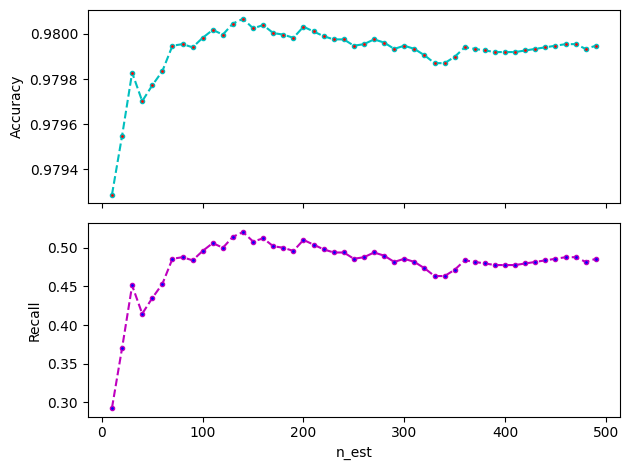

In [37]:
data_features=data[features]
data_features
n_est = list(range(10,500,10))
accs = []
recalls = []
for i in n_est:
    # 模型训练
    iforest = IsolationForest(n_estimators=i, 
                              max_samples=256,  
                              contamination=0.02, 
                              max_features=5,  
                              random_state=1
                              )
    data_features=data[features]
    iforest.fit(X_new)
    data_features['label'] = iforest.fit_predict(X_new) 
    data_features['label'] = (data_features['label'] + 1) // 2
    data_features['label'] = 1 - data_features['label']
    predictions = data_features['label']
    true_labels = data_features['Class']
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(n_est, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(n_est, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('n_est')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()

E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980586853553459 0.6707317073170732


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9805306751589673 0.6544715447154471


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9804183183699838 0.6219512195121951


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9805166305603443 0.6504065040650406


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980600898152082 0.6747967479674797


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9805025859617215 0.6463414634146342


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9804885413630985 0.6422764227642277


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806289873493278 0.6829268292682927


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806219650500163 0.6808943089430894


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980600898152082 0.6747967479674797


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806360096486393 0.6849593495934959


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806430319479508 0.6869918699186992


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806640988458851 0.693089430894309


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806851657438195 0.6991869918699187


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807202772403768 0.709349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807624110362456 0.7215447154471545


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807624110362456 0.7215447154471545


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807483664376226 0.717479674796748


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807062326417539 0.7052845528455285


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807132549410653 0.7073170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807413441383112 0.7154471544715447


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806992103424425 0.7032520325203252


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806992103424425 0.7032520325203252


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807062326417539 0.7052845528455285


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806992103424425 0.7032520325203252


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806851657438195 0.6991869918699187


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980678143444508 0.6971544715447154


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980692188043131 0.7012195121951219


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807062326417539 0.7052845528455285


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807062326417539 0.7052845528455285


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806992103424425 0.7032520325203252


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807272995396883 0.7113821138211383


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807202772403768 0.709349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807272995396883 0.7113821138211383
[0.9803480953768693, 0.9806711211451966, 0.980586853553459, 0.9805306751589673, 0.9804183183699838, 0.9805166305603443, 0.980600898152082, 0.9805025859617215, 0.9804885413630985, 0.9806289873493278, 0.9806219650500163, 0.980600898152082, 0.9806360096486393, 0.9806711211451966, 0.9806430319479508, 0.9806640988458851, 0.980678143444508, 0.980678143444508, 0.980678143444508, 0.9806851657438195, 0.9807202772403768, 0.9807624110362456, 0.9807624110362456, 0.9807483664376226, 0.9807343218389998, 0.9807062326417539, 0.9807132549410653, 0.9807343218389998, 0.9807413441383112, 0.9807343218389998, 0.9807343218389998, 0.9806992103424425, 0.9806992103424425, 0.9807062326417539, 0.9806711211451966, 0.9806992103424425, 0.980678143444508, 0.9806851657438195, 0.980678143444508, 0.9806711211451966, 0.9806711211451966, 0.980678143444508, 0.980692188043131, 0.9807062326417539, 0.9807062326417539, 0.9806992103424425, 0.9807272995396883, 0.9807202772403768, 0.980727299

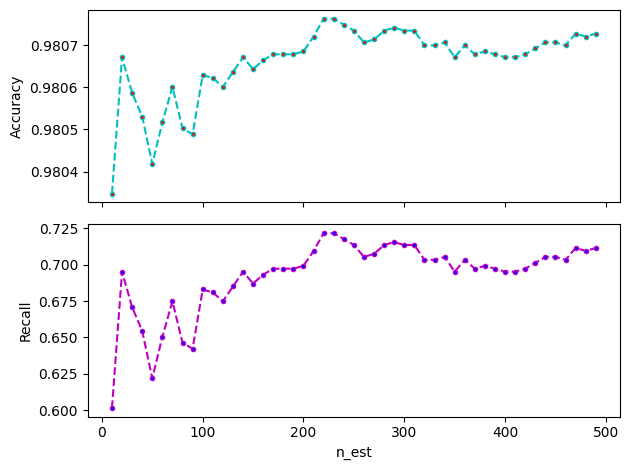

In [38]:
n_est = list(range(10,500,10))
accs = []
recalls = []
for i in n_est:
    # 模型训练
    iforest = IsolationForest(n_estimators=i, 
                              max_samples=256,  
                              contamination=0.02, 
                              max_features=5,  
                              random_state=1
                              )
    iforest.fit(X)
    data['label'] = iforest.fit_predict(X) 
    data['label'] = (data['label'] + 1) // 2
    data['label'] = 1 - data['label']
    predictions = data['label']
    true_labels = Y
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(n_est, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(n_est, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('n_est')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()

E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799829358126732 0.4959349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799969804112961 0.5


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800040027106075 0.5020325203252033


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800672034044107 0.5203252032520326


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799127128195585 0.47560975609756095


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980011025009919 0.5040650406504065


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9797792891326407 0.4369918699186992


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9799478243161158 0.48577235772357724


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9798214229285095 0.4491869918699187


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9800742257037222 0.5223577235772358


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\2318734810.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9797652445340178 0.4329268292682927
[0.9799829358126732, 0.9799969804112961, 0.9800040027106075, 0.9799478243161158, 0.9800672034044107, 0.9799127128195585, 0.980011025009919, 0.9797792891326407, 0.9799478243161158, 0.9798214229285095, 0.9800742257037222, 0.9797652445340178] [0.4959349593495935, 0.5, 0.5020325203252033, 0.48577235772357724, 0.5203252032520326, 0.47560975609756095, 0.5040650406504065, 0.4369918699186992, 0.48577235772357724, 0.4491869918699187, 0.5223577235772358, 0.4329268292682927]


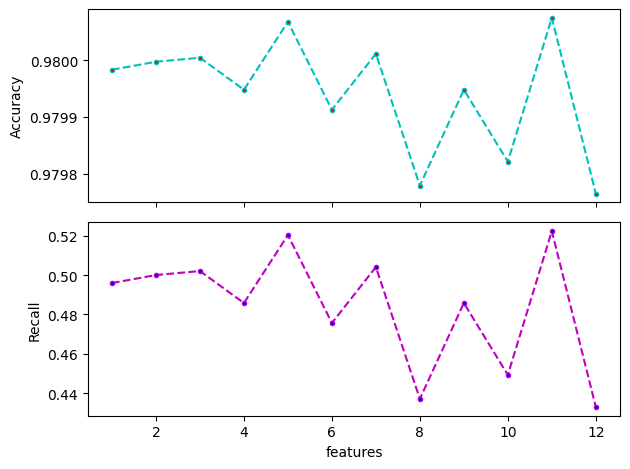

In [39]:
data_features=data[features]
data_features
n_est = list(range(1,13))
accs = []
recalls = []
for i in n_est:
    # 模型训练
    iforest = IsolationForest(n_estimators=140, 
                              max_samples=256,  
                              contamination=0.02, 
                              max_features=i,  
                              random_state=1
                              )
    data_features=data[features]
    iforest.fit(X_new)
    data_features['label'] = iforest.fit_predict(X_new) 
    data_features['label'] = (data_features['label'] + 1) // 2
    data_features['label'] = 1 - data_features['label']
    predictions = data_features['label']
    true_labels = data_features['Class']
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(n_est, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(n_est, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('features')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()

E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980692188043131 0.7012195121951219


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807062326417539 0.7052845528455285


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806430319479508 0.6869918699186992


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.98078347793418 0.7276422764227642


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807624110362456 0.7215447154471545


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9808607232266061 0.75


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9808466786279831 0.7459349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9808466786279831 0.7459349593495935


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807483664376226 0.717479674796748


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9809098793217863 0.7642276422764228


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9809520131176551 0.7764227642276422


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9808607232266061 0.75


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807905002334915 0.7296747967479674


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807413441383112 0.7154471544715447


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9809239239204093 0.7682926829268293


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9806711211451966 0.6951219512195121


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807132549410653 0.7073170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9808537009272946 0.7479674796747967


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807343218389998 0.7134146341463414


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807132549410653 0.7073170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807413441383112 0.7154471544715447


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807694333355571 0.7235772357723578


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980797522532803 0.7317073170731707


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980888812423852 0.758130081300813


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.980874767825229 0.7540650406504065


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807905002334915 0.7296747967479674


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.98078347793418 0.7276422764227642
[0.980692188043131, 0.9807062326417539, 0.9806430319479508, 0.98078347793418, 0.9807624110362456, 0.9808607232266061, 0.9808466786279831, 0.9808466786279831, 0.9807483664376226, 0.9809098793217863, 0.9809520131176551, 0.9808607232266061, 0.9807343218389998, 0.9807905002334915, 0.9807413441383112, 0.9809239239204093, 0.9806711211451966, 0.9807132549410653, 0.9808537009272946, 0.9807343218389998, 0.9807132549410653, 0.9807413441383112, 0.9807694333355571, 0.980797522532803, 0.980888812423852, 0.980874767825229, 0.9807905002334915, 0.98078347793418] [0.7012195121951219, 0.7052845528455285, 0.6869918699186992, 0.7276422764227642, 0.7215447154471545, 0.75, 0.7459349593495935, 0.7459349593495935, 0.717479674796748, 0.7642276422764228, 0.7764227642276422, 0.75, 0.7134146341463414, 0.7296747967479674, 0.7154471544715447, 0.7682926829268293, 0.6951219512195121, 0.7073170731707317, 0.7479674796747967, 0.7134146341463414, 0.7073170731707317, 0.7154471544715447,

ValueError: x and y must have same first dimension, but have shapes (12,) and (28,)

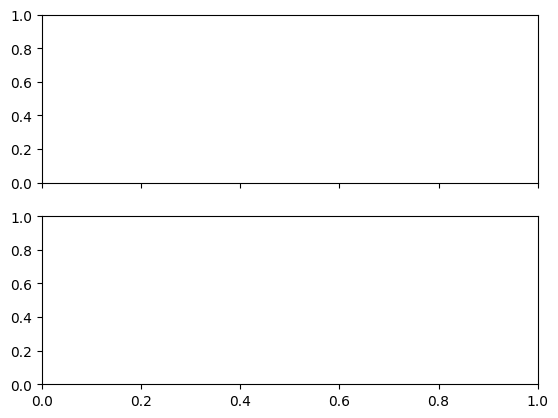

In [40]:
features = list(range(1,29))
accs = []
recalls = []
for i in features:
    # 模型训练
    iforest = IsolationForest(n_estimators=220, 
                              max_samples=256,  
                              contamination=0.02, 
                              max_features=i,  
                              random_state=1
                              )
    iforest.fit(X)
    data['label'] = iforest.fit_predict(X) 
    data['label'] = (data['label'] + 1) // 2
    data['label'] = 1 - data['label']
    predictions = data['label']
    true_labels = Y
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)


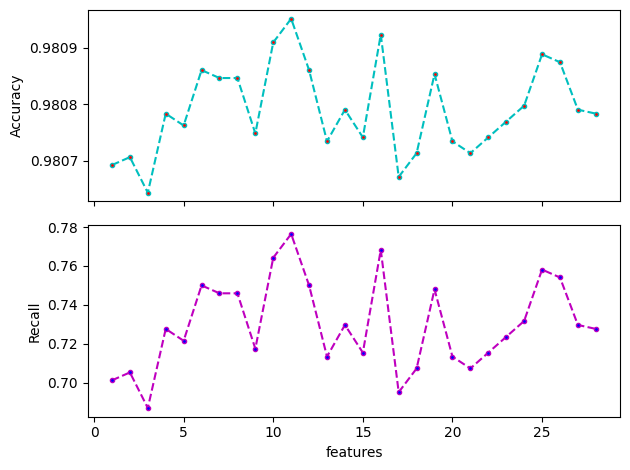

In [41]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(features, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(features, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('features')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()

E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9796247985477885 0.39227642276422764


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9801584932954598 0.5467479674796748


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802287162885743 0.5670731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803059615810005 0.5894308943089431


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802427608871973 0.5711382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802568054858202 0.5752032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802638277851317 0.5772357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802638277851317 0.5772357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802919169823775 0.5853658536585366


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980298939281689 0.5873983739837398


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802006270913285 0.5589430894308943


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802848946830661 0.5833333333333334


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802568054858202 0.5752032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802848946830661 0.5833333333333334


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802638277851317 0.5772357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803270284789348 0.5955284552845529


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802848946830661 0.5833333333333334


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980298939281689 0.5873983739837398


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980298939281689 0.5873983739837398


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803059615810005 0.5894308943089431


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803761845741151 0.6097560975609756


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802919169823775 0.5853658536585366


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802919169823775 0.5853658536585366


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803200061796234 0.5934959349593496


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803200061796234 0.5934959349593496


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802638277851317 0.5772357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803832068734266 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803445842272135 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980298939281689 0.5873983739837398


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802146716899515 0.5630081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802568054858202 0.5752032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802708500844431 0.5792682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804112960706725 0.6199186991869918


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803059615810005 0.5894308943089431


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804112960706725 0.6199186991869918


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804393852679183 0.6280487804878049


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804604521658526 0.6341463414634146


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803867180230823 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804534298665412 0.6321138211382114


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804534298665412 0.6321138211382114


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804534298665412 0.6321138211382114


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803972514720495 0.6158536585365854


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980390229172738 0.6138211382113821


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804604521658526 0.6341463414634146


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804323629686068 0.6260162601626016


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803761845741151 0.6097560975609756


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804112960706725 0.6199186991869918


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803270284789348 0.5955284552845529


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803059615810005 0.5894308943089431


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803200061796234 0.5934959349593496


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802708500844431 0.5792682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802708500844431 0.5792682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803200061796234 0.5934959349593496


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802919169823775 0.5853658536585366


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803832068734266 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803200061796234 0.5934959349593496


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802778723837546 0.5813008130081301


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803410730775578 0.5995934959349594


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803270284789348 0.5955284552845529


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803761845741151 0.6097560975609756


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9802778723837546 0.5813008130081301


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803832068734266 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803059615810005 0.5894308943089431


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804674744651641 0.6361788617886179


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803761845741151 0.6097560975609756


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803832068734266 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980390229172738 0.6138211382113821


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803832068734266 0.6117886178861789


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804744967644756 0.6382113821138211


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803340507782463 0.5975609756097561


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803551176761807 0.6036585365853658


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803761845741151 0.6097560975609756


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803270284789348 0.5955284552845529


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803480953768693 0.6016260162601627


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803270284789348 0.5955284552845529


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803621399754922 0.6056910569105691


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804253406692953 0.6239837398373984


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804253406692953 0.6239837398373984


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803972514720495 0.6158536585365854


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.980312983880312 0.5914634146341463


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9803691622748036 0.6077235772357723


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_features['label'] = iforest.fit_predict(X_new)
C:\Users\luoji\AppData\Local\Temp\ipykernel_10548\4135497315.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

0.9804112960706725 0.6199186991869918
[0.9796247985477885, 0.9801584932954598, 0.9802287162885743, 0.9803059615810005, 0.9802427608871973, 0.9803340507782463, 0.9802568054858202, 0.9802638277851317, 0.9802638277851317, 0.9803410730775578, 0.9803480953768693, 0.9802919169823775, 0.980298939281689, 0.9802006270913285, 0.9803340507782463, 0.9802848946830661, 0.9802568054858202, 0.9802848946830661, 0.9802638277851317, 0.9803621399754922, 0.9803691622748036, 0.980312983880312, 0.9803270284789348, 0.9803551176761807, 0.9803410730775578, 0.9802848946830661, 0.980298939281689, 0.9803551176761807, 0.980312983880312, 0.9803480953768693, 0.980298939281689, 0.9803410730775578, 0.980312983880312, 0.9803059615810005, 0.9803551176761807, 0.980312983880312, 0.9803761845741151, 0.9802919169823775, 0.9802919169823775, 0.9803200061796234, 0.9803200061796234, 0.9802638277851317, 0.9803480953768693, 0.9803480953768693, 0.980312983880312, 0.9803410730775578, 0.9803340507782463, 0.9803832068734266, 0.9803621

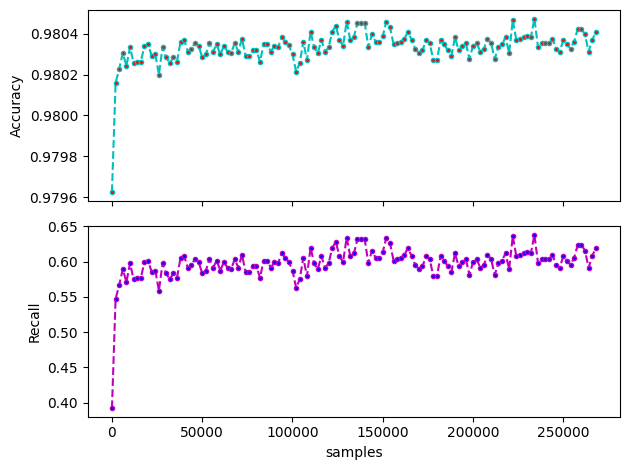

In [48]:
samples = list(range(50,270000,2000))
accs = []
recalls = []
for i in samples:
    # 模型训练
    iforest = IsolationForest(n_estimators=140, 
                              max_samples=i,  
                              contamination=0.02, 
                              max_features=11,  
                              random_state=1
                              )
    iforest.fit(X_new)
    data_features['label'] = iforest.fit_predict(X_new) 
    data_features['label'] = (data_features['label'] + 1) // 2
    data_features['label'] = 1 - data_features['label']
    predictions = data_features['label']
    true_labels = data_features['Class']
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(samples, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(samples, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('samples')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()

E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9807272995396883 0.7113821138211383


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810503253080156 0.8048780487804879


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810292584100813 0.7987804878048781


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810362807093926 0.8008130081300813


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810784145052615 0.8130081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810784145052615 0.8130081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810784145052615 0.8130081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.98107139220595 0.8109756097560976


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811345928997531 0.8292682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811345928997531 0.8292682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811310817500974 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.98107139220595 0.8109756097560976


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810643699066385 0.8089430894308943


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811275706004418 0.8272357723577236


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810362807093926 0.8008130081300813


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810643699066385 0.8089430894308943


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810784145052615 0.8130081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.98107139220595 0.8109756097560976


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811205483011303 0.8252032520325203


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811345928997531 0.8292682926829268


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810924591038844 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810784145052615 0.8130081300813008


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810854368045729 0.8150406504065041


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810854368045729 0.8150406504065041


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811065037025073 0.8211382113821138


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810959702535401 0.8170731707317073


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9810994814031958 0.8191056910569106


E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
E:\softwore\anaconda\envs\twitter_lab\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


0.9811135260018188 0.823170731707317
[0.9807272995396883, 0.9810503253080156, 0.9810292584100813, 0.9810362807093926, 0.9811205483011303, 0.9810784145052615, 0.9811205483011303, 0.9811135260018188, 0.9810924591038844, 0.9810784145052615, 0.9810994814031958, 0.9810924591038844, 0.9810924591038844, 0.9811205483011303, 0.9811135260018188, 0.9810784145052615, 0.9810924591038844, 0.9810994814031958, 0.9811135260018188, 0.9811065037025073, 0.9811135260018188, 0.9811065037025073, 0.9810924591038844, 0.9811065037025073, 0.9811065037025073, 0.9811135260018188, 0.9810994814031958, 0.9811135260018188, 0.9811135260018188, 0.9811135260018188, 0.9810924591038844, 0.9811065037025073, 0.9810994814031958, 0.9810924591038844, 0.9811065037025073, 0.9811135260018188, 0.9811135260018188, 0.98107139220595, 0.9810924591038844, 0.9811065037025073, 0.9811205483011303, 0.9811205483011303, 0.9811135260018188, 0.9811345928997531, 0.9811345928997531, 0.9811065037025073, 0.9811205483011303, 0.9811065037025073, 0.98

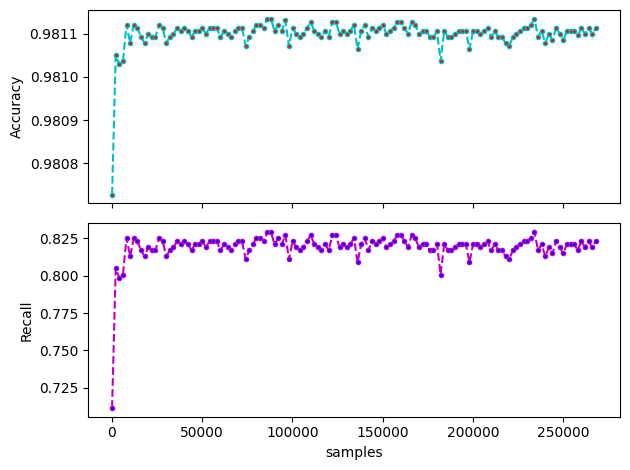

In [50]:
samples = list(range(50,270000,2000))
accs = []
recalls = []
for i in samples:
    # 模型训练
    iforest = IsolationForest(n_estimators=220, 
                              max_samples=i,  
                              contamination=0.02, 
                              max_features=11,  
                              random_state=1
                              )
    iforest.fit(X)
    data['label'] = iforest.fit_predict(X) 
    data['label'] = (data['label'] + 1) // 2
    data['label'] = 1 - data['label']
    predictions = data['label']
    true_labels = Y
    accuracy = accuracy_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    print(accuracy,recall)
    accs.append(accuracy)
    recalls.append(recall)
print(accs,recalls)
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(samples, accs, linestyle='--', marker='.', color='c', markerfacecolor='red')
ax1.set_ylabel('Accuracy')  

ax2.plot(samples, recalls, linestyle='--', marker='.', color='m', markerfacecolor='blue')
ax2.set_xlabel('samples')  
ax2.set_ylabel('Recall')  

plt.tight_layout()
plt.show()